<a id='top'></a>

# CSCI3022 F21
# Homework 9: Simple and Multiple Linear Regression
***

**Name**: Nathan Shaver

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 6 Dec**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

**Shortcuts:**  problems 1-4: Anscombe [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) | [5](p#5)---

In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [1-4 problems: 9 points/ea]


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.  If the model violates any assumptions, consider the following "corrections:"
 - adding higher powers of $x$ to the model to address concavity/curvature/nonlinearity
 - removing outlying data points, and explaining how this affects the model **inference**
 - removing high leverage data points, and explaining how this affects the model **inference**
 - doing nothing, but describing which assumptions might be broken and some possible implications


In [2]:
df = sns.load_dataset("anscombe")

print(df.head(50))
df['dataset'].unique()

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [9 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

X min:  4.0 , Y min:  4.26
X Q1:  6.5 , Y Q1:  6.3149999999999995
X median :  9.0 , Y median:  7.58
X Q3:  11.5 , Y Q3:  8.57
X max:  14.0 , Y max:  10.84
X mean:  9.0 , Y mean:  7.500909090909093
X standard deviation:  3.3166247903554 , Y standard deviation:  2.031568135925815


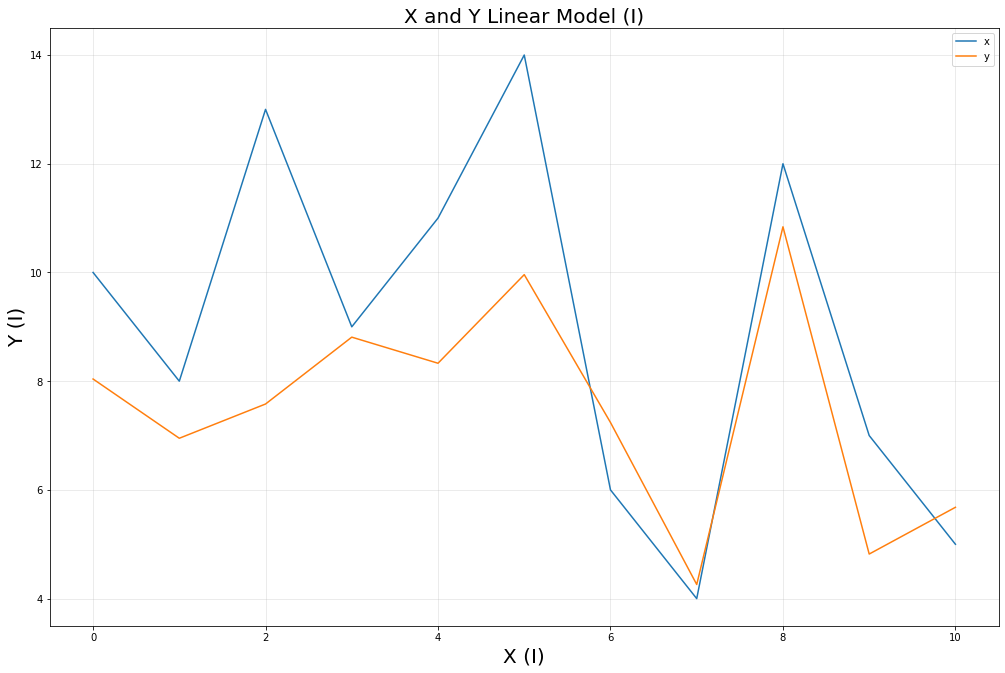

In [3]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
x =(df['x'].loc[(df['dataset'] == 'I')])
y =(df['y'].loc[(df['dataset'] == 'I')])
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X (I)", fontsize = 20)
ax.set_ylabel("Y (I)", fontsize = 20)
ax.set_title("X and Y Linear Model (I)", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Original x values vs Residuals of Least Squares')

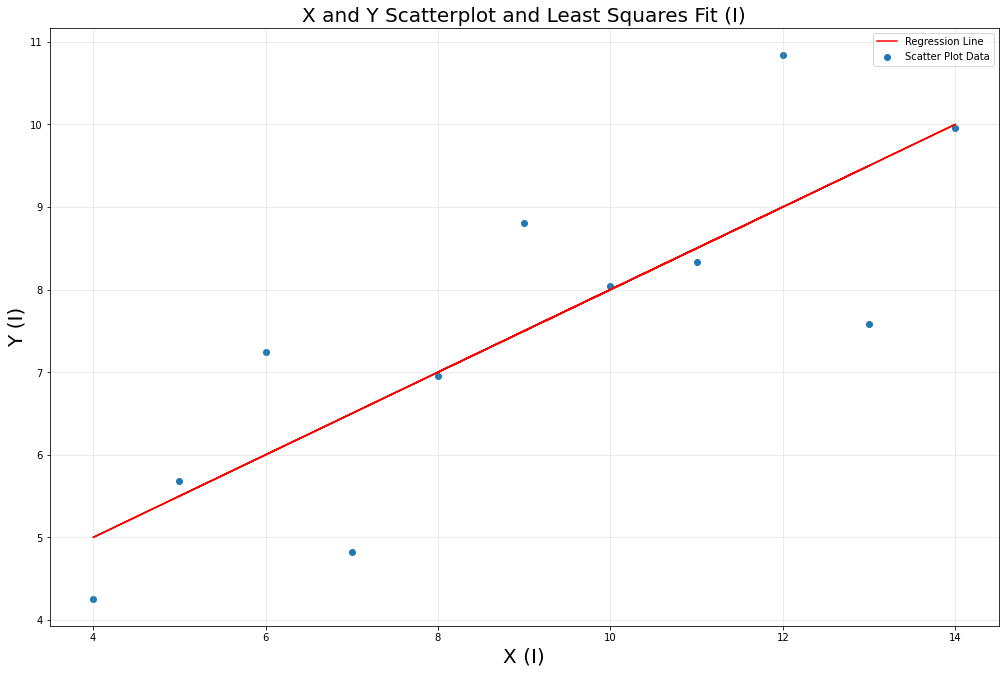

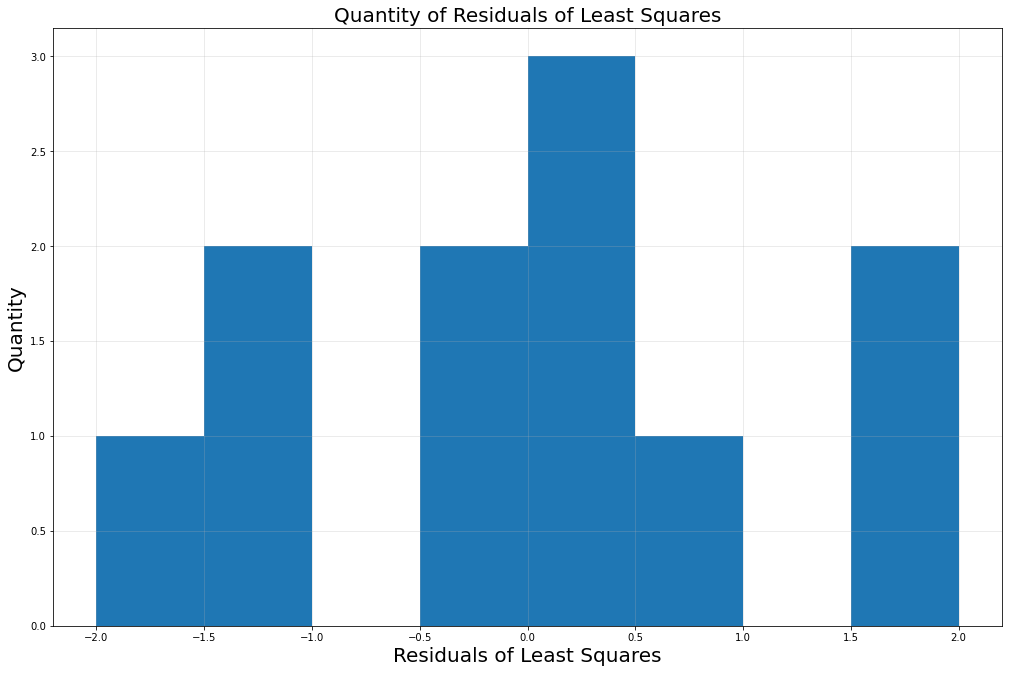

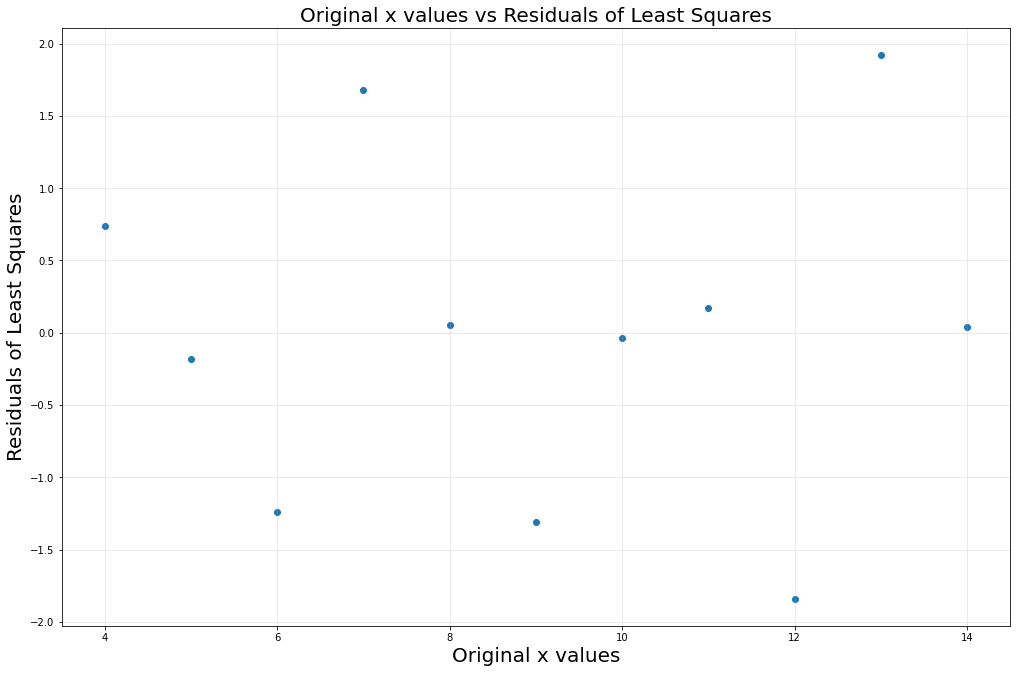

In [4]:
#Plotting the first plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (I)", fontsize = 20)
ax.set_ylabel("Y (I)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit (I)", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#plotting the second plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
bins = [-2, -1.5, -1, -.5, 0, .5, 1, 1.5, 2]
combo = df.loc[(df['dataset'] == 'I')].sort_values('x')
newX = combo['x']
newY = combo['y']
histo = line - newY

plt.hist(histo, bins = bins)
ax.grid(alpha = .3)
ax.set_xlabel("Residuals of Least Squares", fontsize = 20)
ax.set_ylabel("Quantity", fontsize = 20)
ax.set_title("Quantity of Residuals of Least Squares", fontsize = 20)

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

**Linear Relationship:** There exists a positive relationship between x and y. The plot in part A indicates that as x increases, so does y, as the two graphs are closely correlated. 

**Independence:** The residuals of the least squares regression line are independent. There is no correlation between the x data values and the residual. 

**Homoscedasticity:** The residuals have a relatively constant variance at every level of x. There are no distinct outliers.

**Normality:** The residuals are also relatively normally distributed. The histogram is unimodal and has no left or right skew.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another table and set of plots as in parts A and B of the new fit and the new residuals.

The data set did not violate any assumptions in part C.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The result of the data set passing each major assumption is that the results are reliable and consistent. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [9 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

X min:  4.0 , Y min:  3.1
X Q1:  6.5 , Y Q1:  6.695
X median :  9.0 , Y median:  8.14
X Q3:  11.5 , Y Q3:  8.95
X max:  14.0 , Y max:  9.26
X mean:  9.0 , Y mean:  7.500909090909091
X standard deviation:  3.3166247903554 , Y standard deviation:  2.0316567355016177


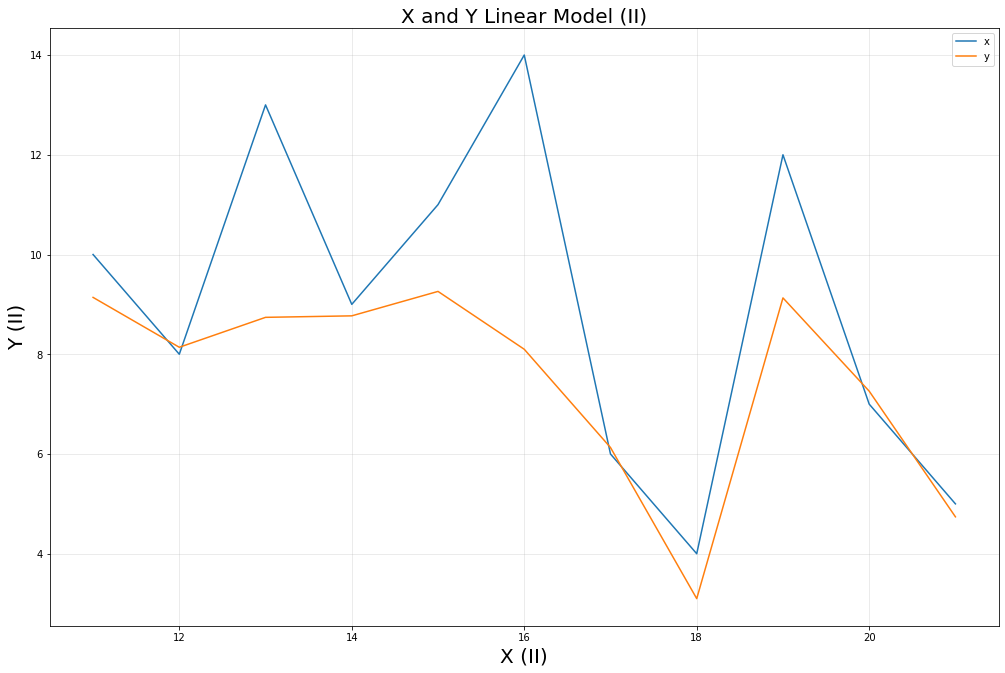

In [5]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
x =(df['x'].loc[(df['dataset'] == 'II')])
y =(df['y'].loc[(df['dataset'] == 'II')])
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X (II)", fontsize = 20)
ax.set_ylabel("Y (II)", fontsize = 20)
ax.set_title("X and Y Linear Model (II)", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Original x values vs Residuals of Least Squares')

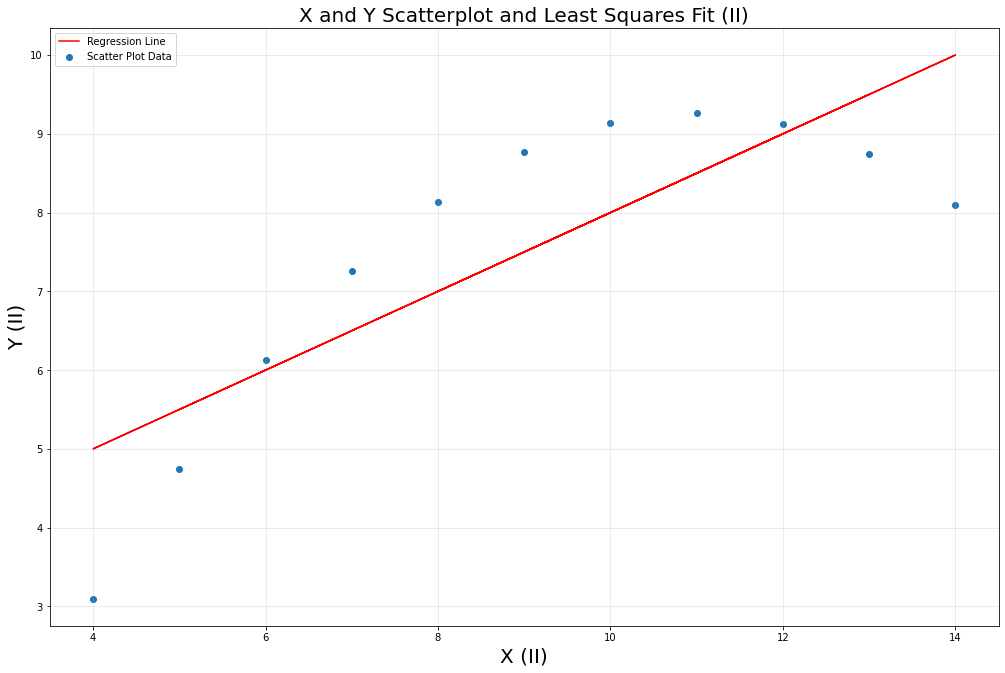

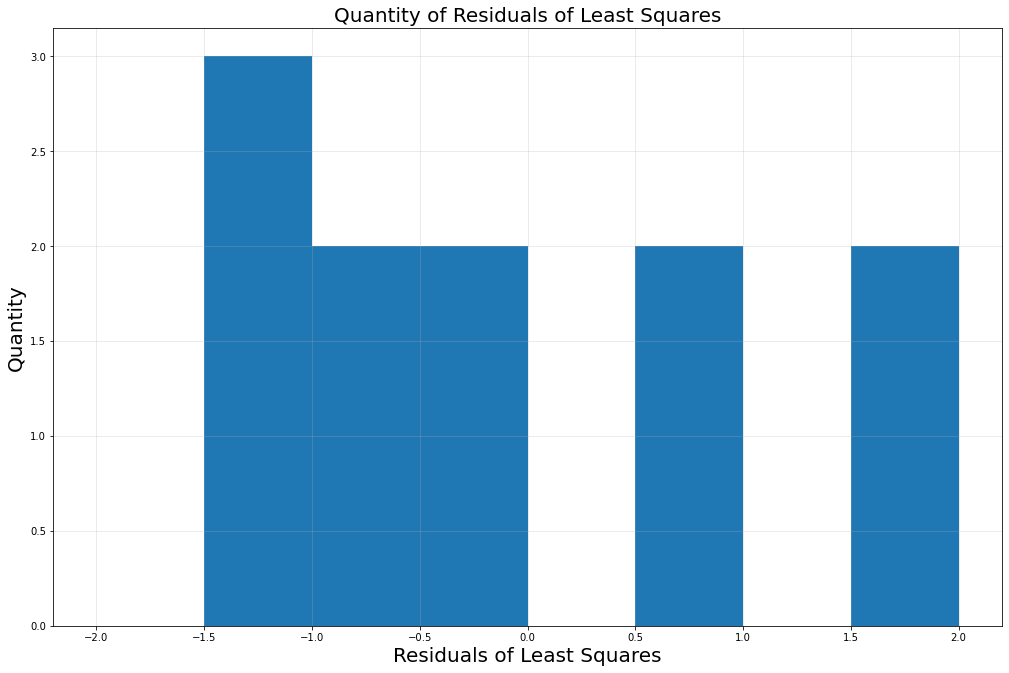

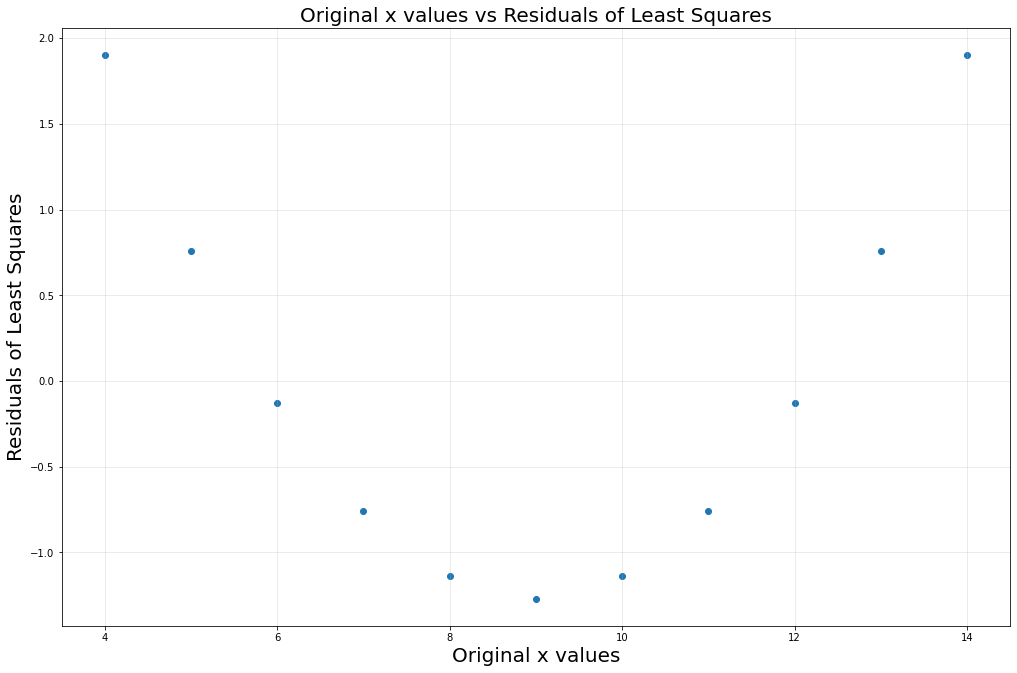

In [6]:
#Plotting the first plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (II)", fontsize = 20)
ax.set_ylabel("Y (II)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit (II)", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#plotting the second plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
bins = [-2, -1.5, -1, -.5, 0, .5, 1, 1.5, 2]
combo = df.loc[(df['dataset'] == 'II')].sort_values('x')
newX = combo['x']
newY = combo['y']
histo = line - newY

plt.hist(histo, bins = bins)
ax.grid(alpha = .3)
ax.set_xlabel("Residuals of Least Squares", fontsize = 20)
ax.set_ylabel("Quantity", fontsize = 20)
ax.set_title("Quantity of Residuals of Least Squares", fontsize = 20)

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

**Linear Relationship:** There exists a somewhat positive relationship between x and y. The plot in part A indicates that as x increases, so does y, as the two graphs are somewhat correlated. 

**Independence:** The residuals of the least squares regression line are dependent. There is a correlation between the x data values and the residual, which appears to follow in a parabolic relationship.

**Homoscedasticity:** The residuals have a relatively constant variance at every level of x. There are no distinct outliers.

**Normality:** The residuals are also do not appear normally distributed. The histogram is almost entirely constant.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

X min:  4.0 , Y min:  9.610000000000001
X Q1:  6.5 , Y Q1:  45.142250000000004
X median :  9.0 , Y median:  66.2596
X Q3:  11.5 , Y Q3:  80.1349
X max:  14.0 , Y max:  85.74759999999999
X mean:  9.0 , Y mean:  60.01602727272727
X standard deviation:  3.3166247903554 , Y standard deviation:  26.25196297304607


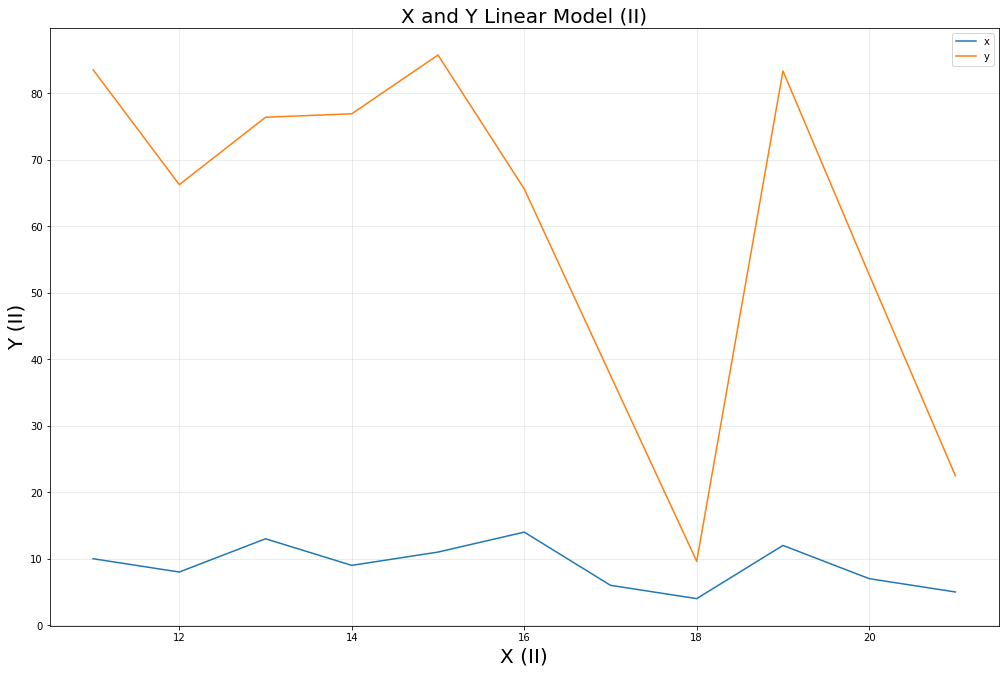

In [7]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
x =(df['x'].loc[(df['dataset'] == 'II')])
y =(df['y'].loc[(df['dataset'] == 'II')])
y = y ** (2)
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X (II)", fontsize = 20)
ax.set_ylabel("Y (II)", fontsize = 20)
ax.set_title("X and Y Linear Model (II)", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())

Text(0.5, 1.0, 'Original x values vs Residuals of Least Squares')

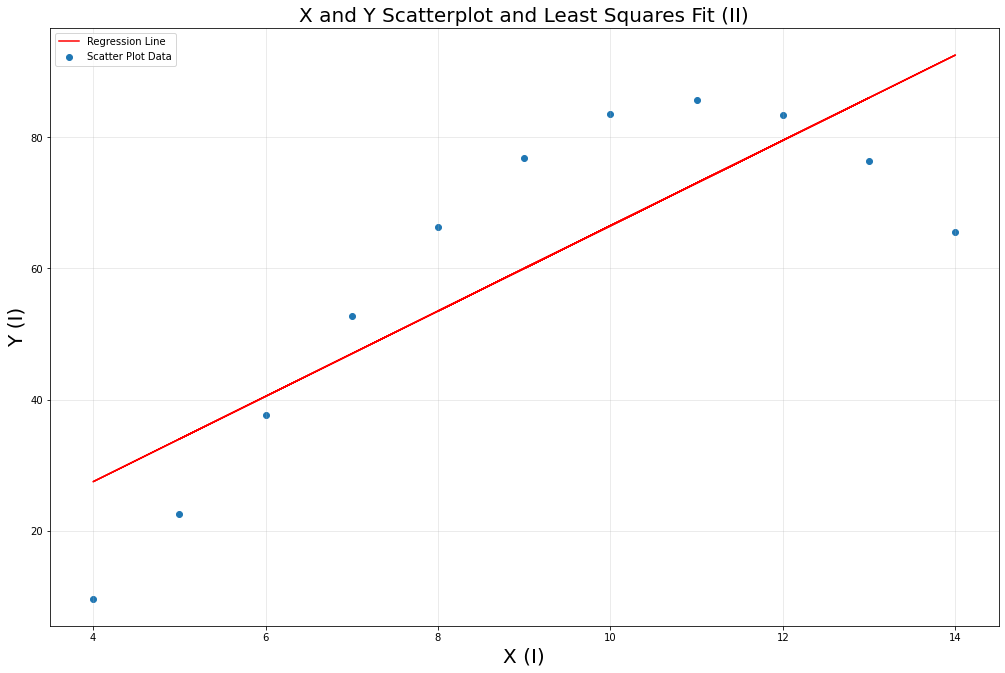

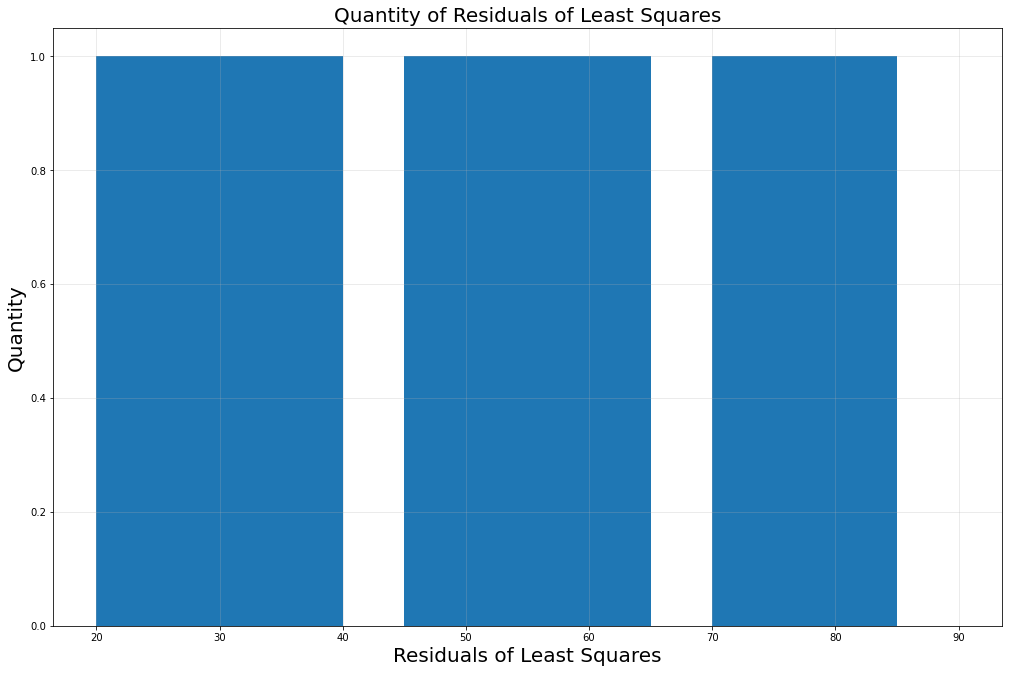

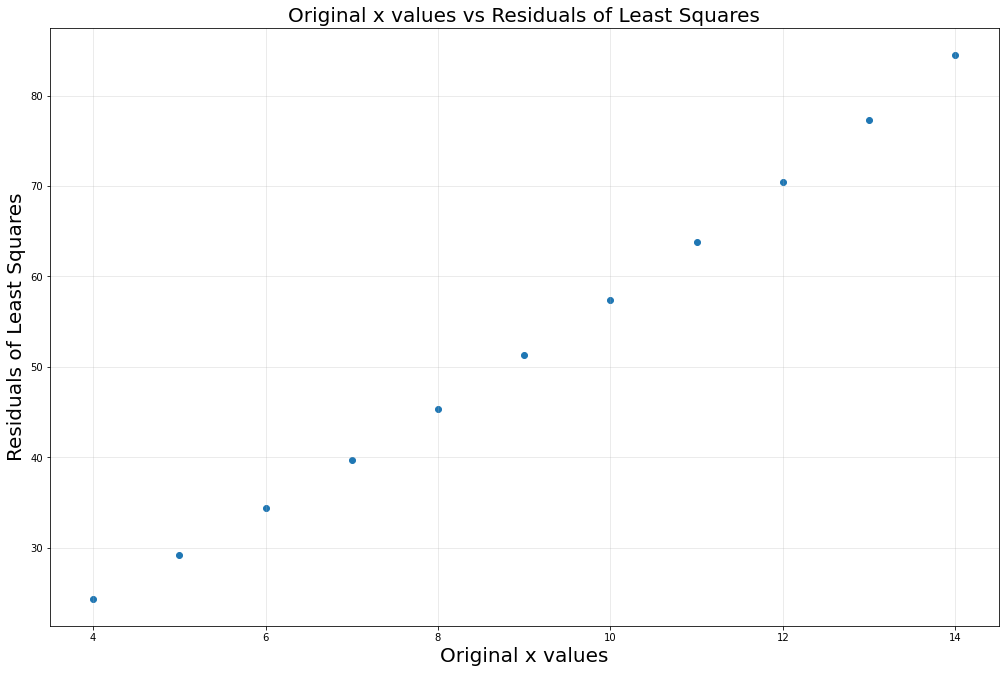

In [8]:
#Plotting the first plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (I)", fontsize = 20)
ax.set_ylabel("Y (I)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit (II)", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#plotting the second plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
combo = df.loc[(df['dataset'] == 'II')].sort_values('x')
newX = combo['x']
newY = combo['y']
histo = line - newY

plt.hist(histo, bins = bins)
ax.grid(alpha = .3)
ax.set_xlabel("Residuals of Least Squares", fontsize = 20)
ax.set_ylabel("Quantity", fontsize = 20)
ax.set_title("Quantity of Residuals of Least Squares", fontsize = 20)

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

To get rid of the parabolic form, I squared the y values. This made the 3rd plot have a linear relationship instead of a polynomial one. Additionally, the histogram lost its normality and appears to be relatively constant.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [9 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

X min:  4.0 , Y min:  5.39
X Q1:  6.5 , Y Q1:  6.25
X median :  9.0 , Y median:  7.11
X Q3:  11.5 , Y Q3:  7.98
X max:  14.0 , Y max:  12.74
X mean:  9.0 , Y mean:  7.500000000000001
X standard deviation:  3.3166247903554 , Y standard deviation:  2.030423601123667


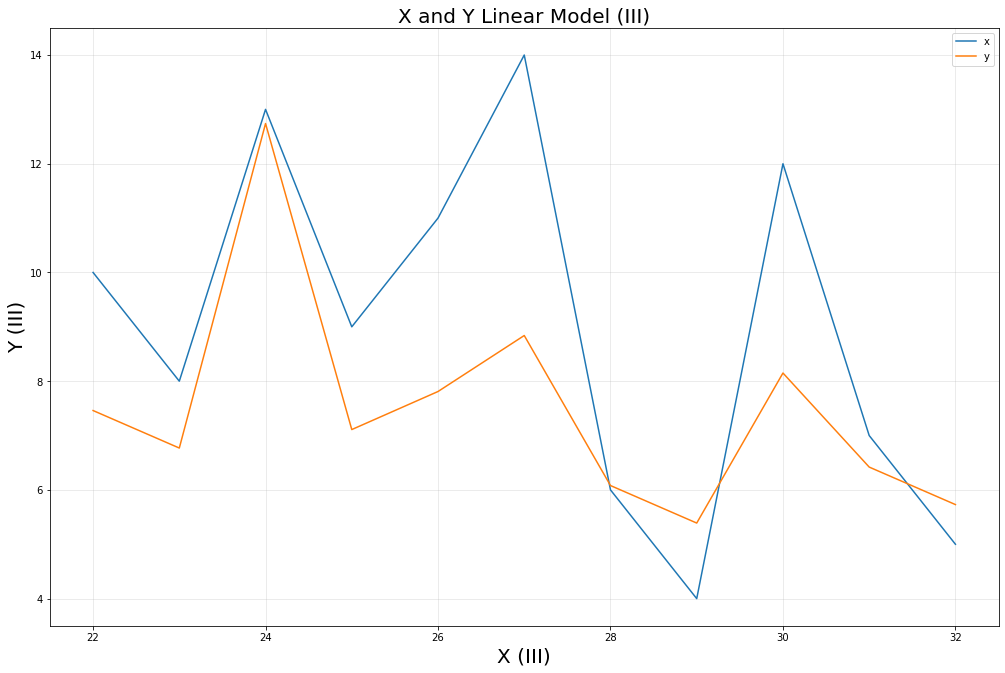

In [9]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
x =(df['x'].loc[(df['dataset'] == 'III')])
y =(df['y'].loc[(df['dataset'] == 'III')])
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X (III)", fontsize = 20)
ax.set_ylabel("Y (III)", fontsize = 20)
ax.set_title("X and Y Linear Model (III)", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Original x values vs Residuals of Least Squares')

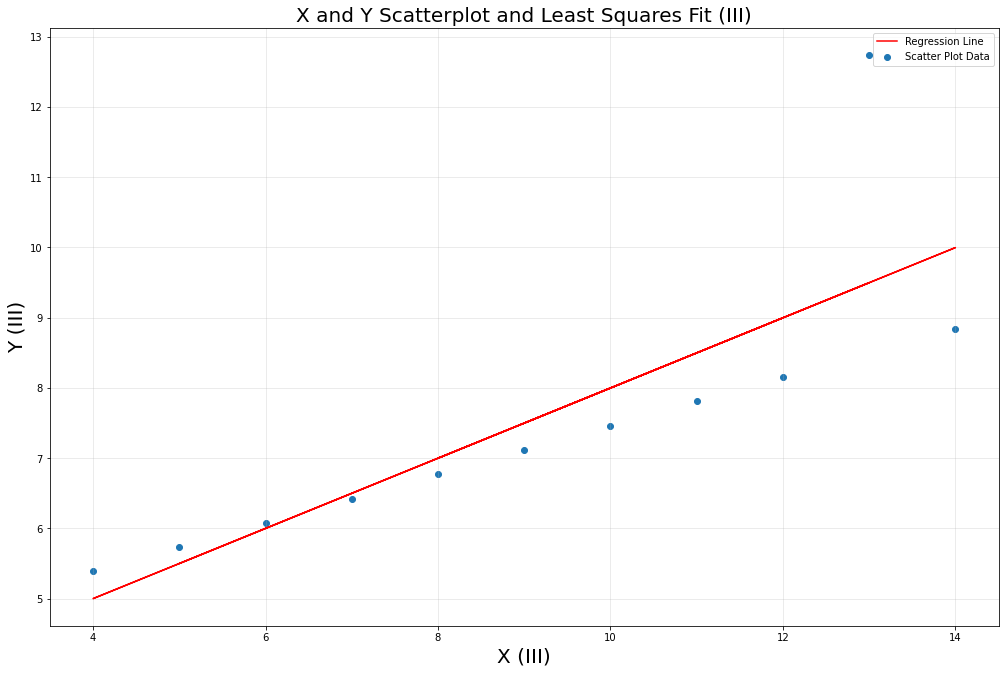

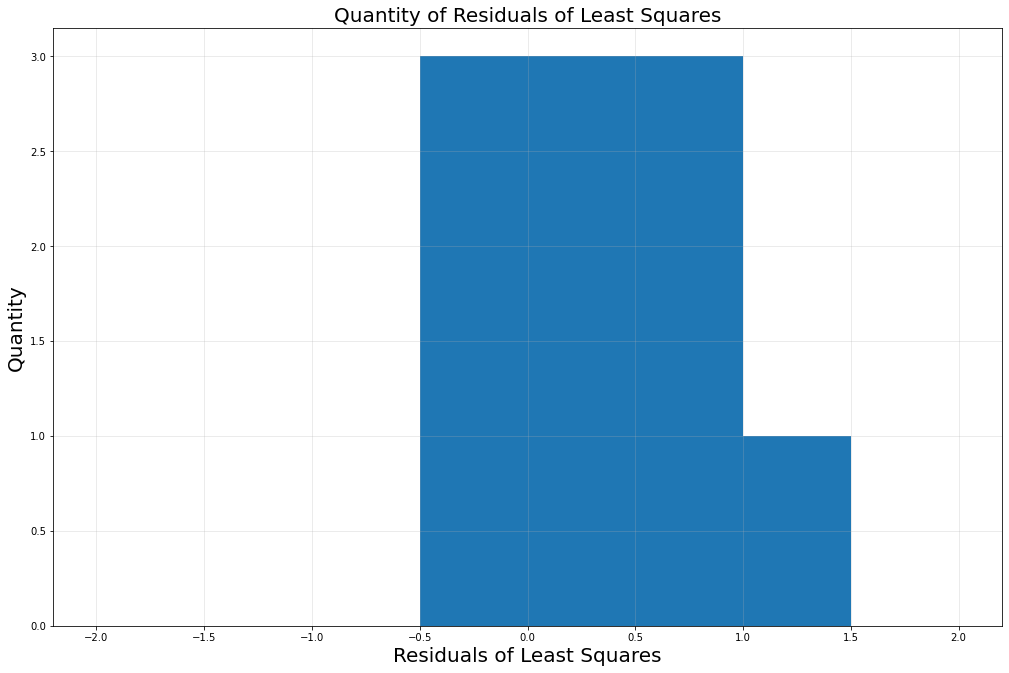

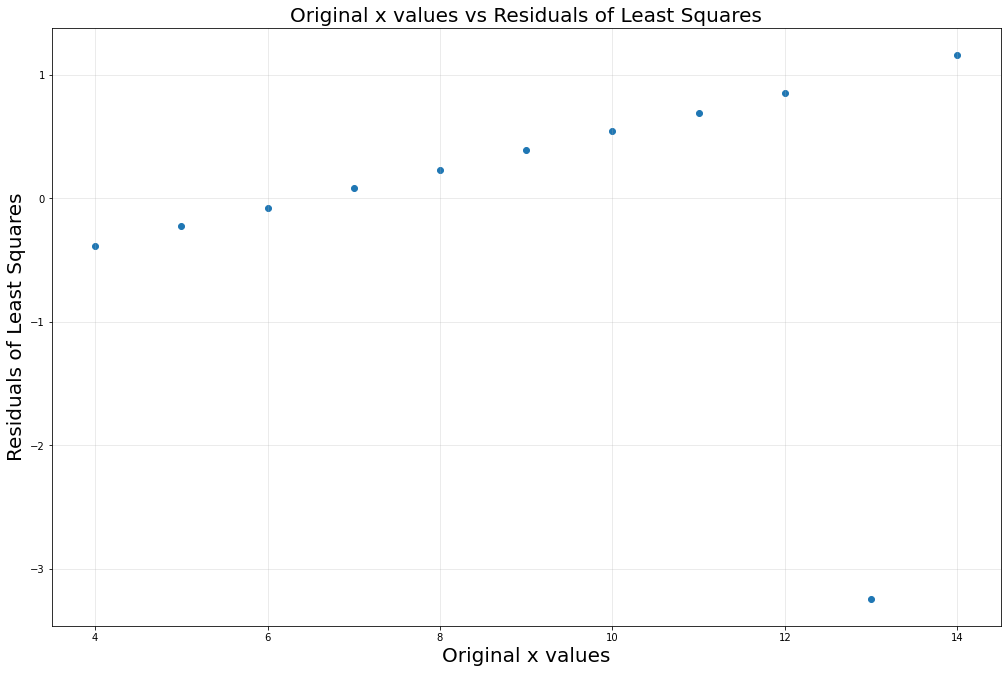

In [10]:
#Plotting the first plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (III)", fontsize = 20)
ax.set_ylabel("Y (III)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit (III)", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#plotting the second plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
bins = [-2, -1.5, -1, -.5, 0, .5, 1, 1.5, 2]
combo = df.loc[(df['dataset'] == 'III')].sort_values('x')
newX = combo['x']
newY = combo['y']
histo = line - newY

plt.hist(histo, bins = bins)
ax.grid(alpha = .3)
ax.set_xlabel("Residuals of Least Squares", fontsize = 20)
ax.set_ylabel("Quantity", fontsize = 20)
ax.set_title("Quantity of Residuals of Least Squares", fontsize = 20)

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

**Linear Relationship:** There exists a positive relationship between x and y. The plot in part A indicates that as x increases, so does y, as the two graphs are closely correlated. 

**Independence:** The residuals of the least squares regression line are independent. There is  no correlation between the x data values and the residual, with the exception of am outlier.

**Homoscedasticity:** The residuals do not have a relatively constant variance at every level of x due to there being a distinct outlier.

**Normality:** The residuals are also do not appear normally distributed. The histogram is almost entirely constant.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

X min:  4 , Y min:  5.39
X Q1:  6.25 , Y Q1:  6.165
X median :  8.5 , Y median:  6.9399999999999995
X Q3:  10.75 , Y Q3:  7.7225
X max:  14 , Y max:  8.84
X mean:  8.6 , Y mean:  6.976000000000001
X standard deviation:  3.0397368307141326 , Y standard deviation:  1.0498971378187483


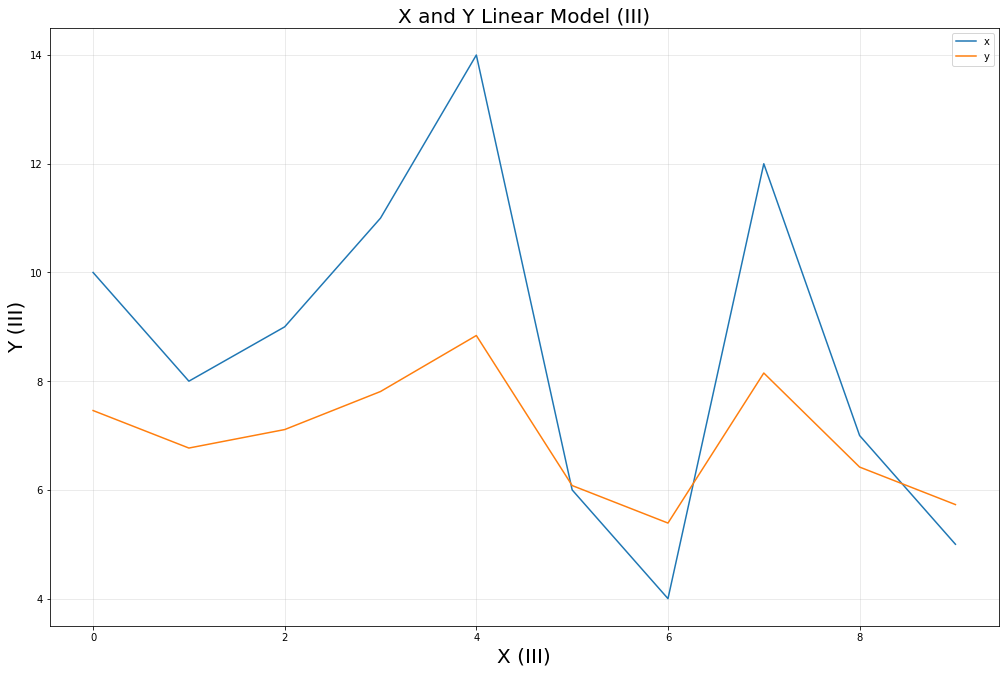

In [11]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
#x =(df['x'].loc[(df['dataset'] == 'III')])
x1 = [10, 8, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [7.46, 6.77, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x = np.array(x1)
y = np.array(y1)
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X (III)", fontsize = 20)
ax.set_ylabel("Y (III)", fontsize = 20)
ax.set_title("X and Y Linear Model (III)", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())

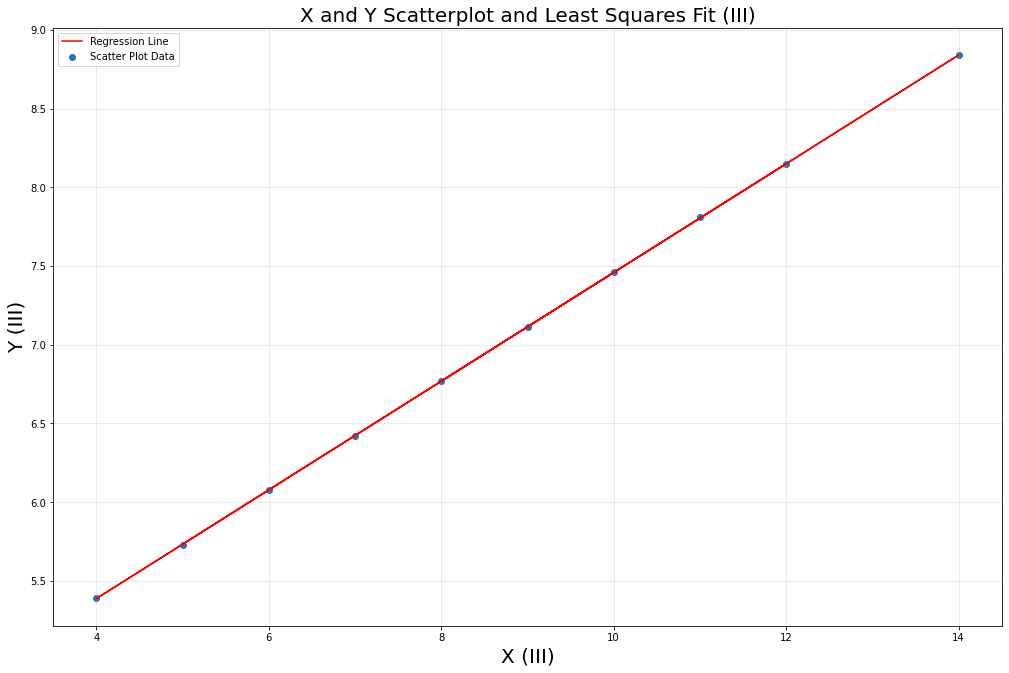

In [12]:
#Plotting the first plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (III)", fontsize = 20)
ax.set_ylabel("Y (III)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit (III)", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])



#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Removing the outlier allowed the residual line to perfectly line up with the values of x. It also allows us to accuratly predict what the outlier should have been, if it was an error that incurred its initial result.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [9 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.

#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

X min:  8.0 , Y min:  5.25
X Q1:  8.0 , Y Q1:  6.17
X median :  8.0 , Y median:  7.04
X Q3:  8.0 , Y Q3:  8.190000000000001
X max:  19.0 , Y max:  12.5
X mean:  9.0 , Y mean:  7.50090909090909
X standard deviation:  3.3166247903554 , Y standard deviation:  2.0305785113876023


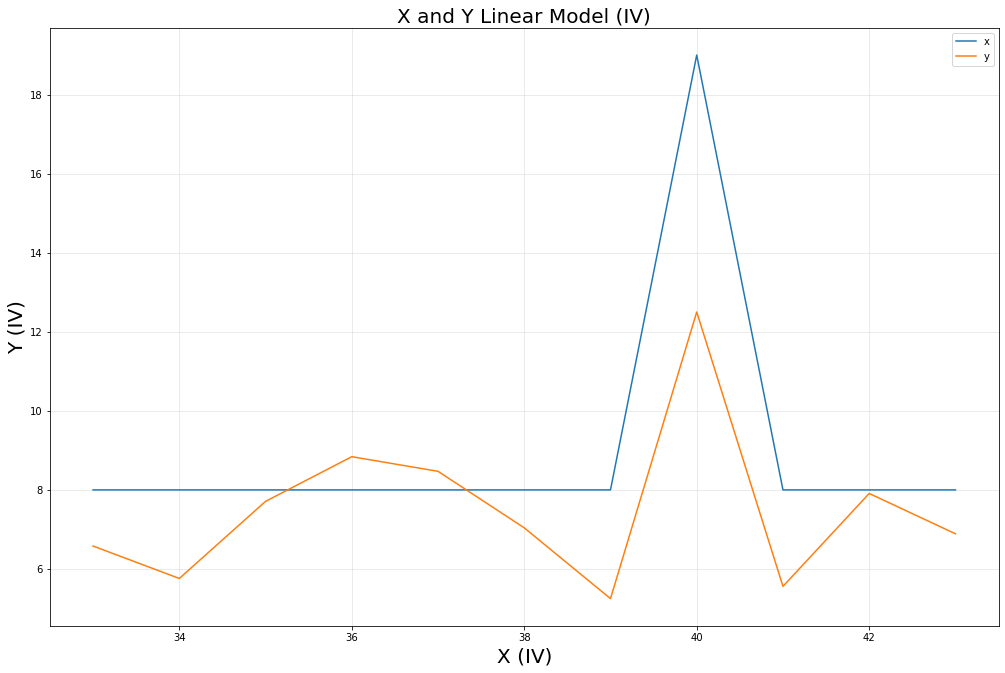

In [13]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
x =(df['x'].loc[(df['dataset'] == 'IV')])
y =(df['y'].loc[(df['dataset'] == 'IV')])
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X (IV)", fontsize = 20)
ax.set_ylabel("Y (IV)", fontsize = 20)
ax.set_title("X and Y Linear Model (IV)", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Original x values vs Residuals of Least Squares')

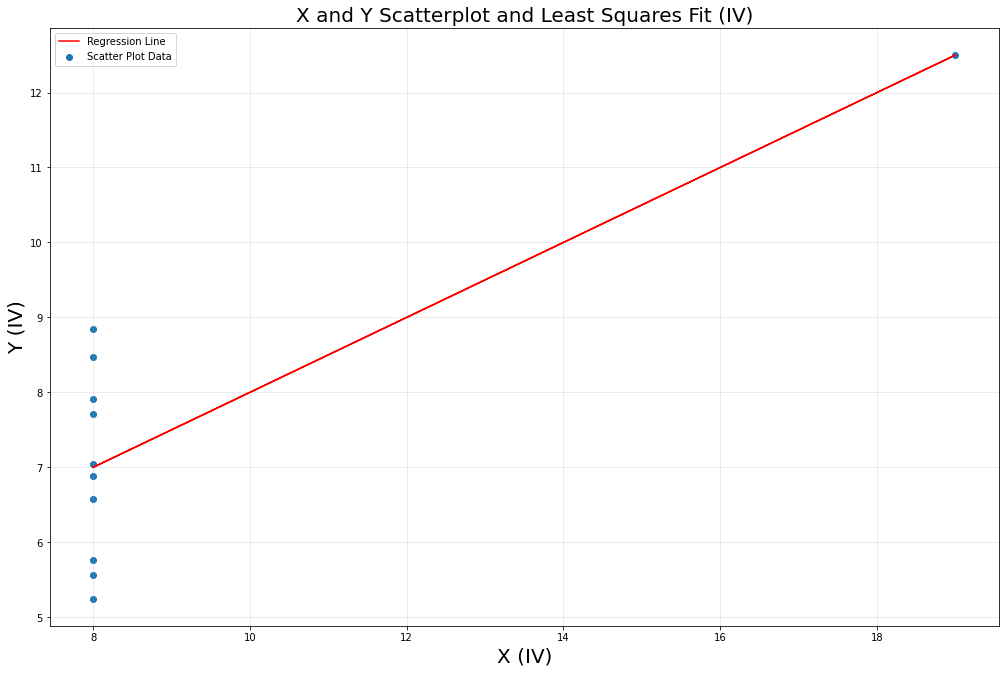

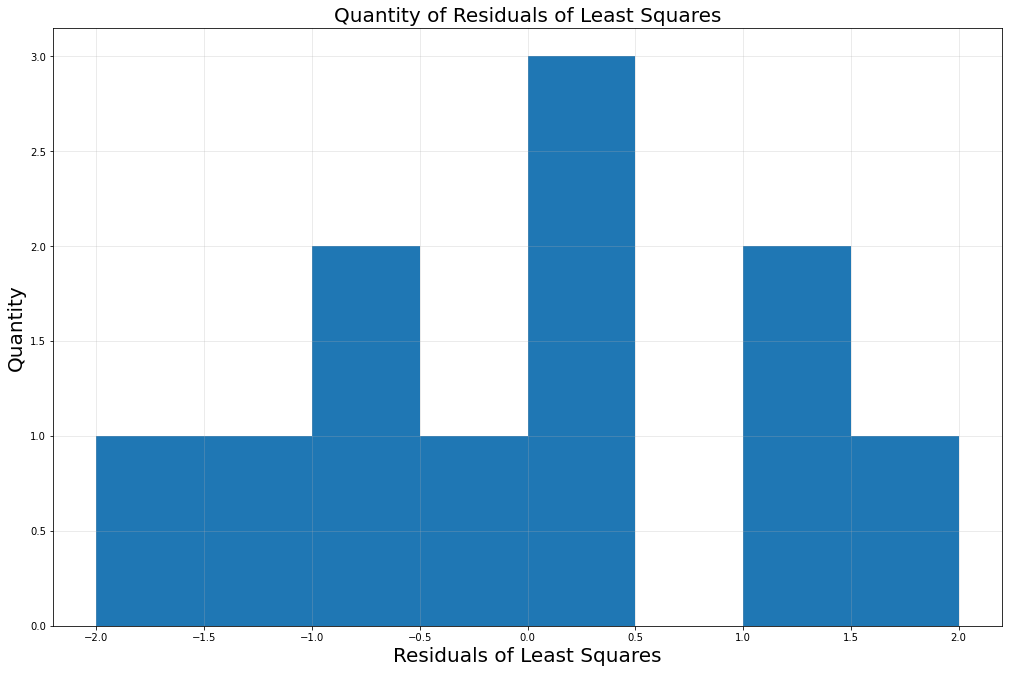

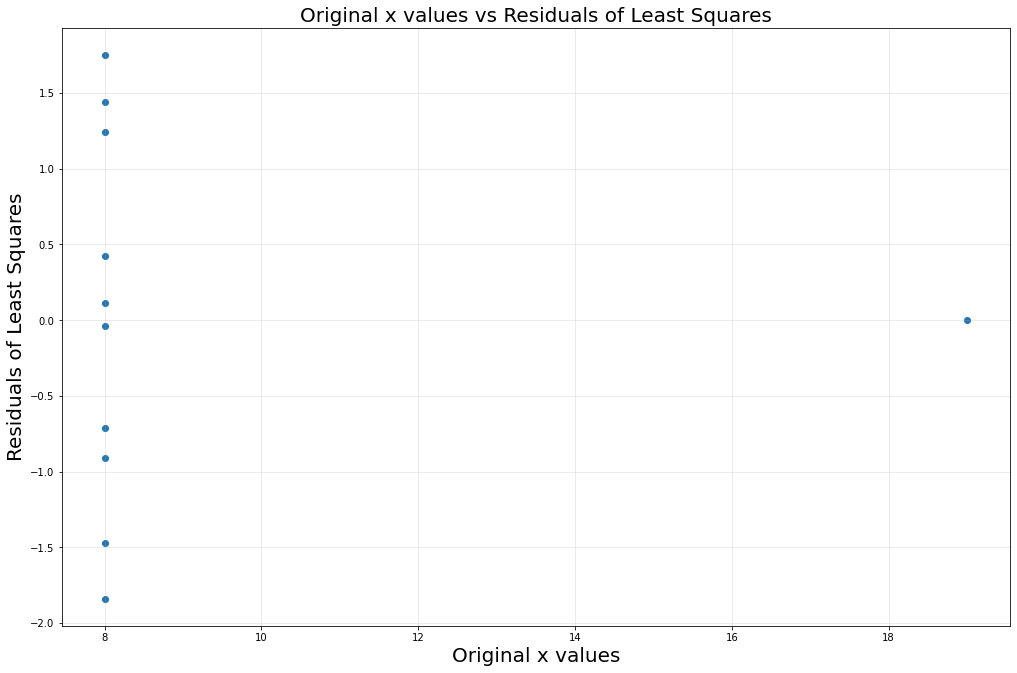

In [14]:
#Plotting the first plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (IV)", fontsize = 20)
ax.set_ylabel("Y (IV)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit (IV)", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#plotting the second plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
bins = [-2, -1.5, -1, -.5, 0, .5, 1, 1.5, 2]
combo = df.loc[(df['dataset'] == 'IV')].sort_values('x')
newX = combo['x']
newY = combo['y']
histo = line - newY

plt.hist(histo, bins = bins)
ax.grid(alpha = .3)
ax.set_xlabel("Residuals of Least Squares", fontsize = 20)
ax.set_ylabel("Quantity", fontsize = 20)
ax.set_title("Quantity of Residuals of Least Squares", fontsize = 20)

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

**Linear Relationship:** There does not exist a relationship between x and y. The plot in part A indicates that as x remains almost entirely constant while y remains independent of x. The except is 1 outlier.

**Independence:** The residuals of the least squares regression line are dependent. There is a correlation between the x data values and the residual, with the x coordinates remaining constant and the one outlier pulling the residual line away.

**Homoscedasticity:** The residuals do not have a relatively constant variance at every level of x due to there being a distinct outlier.

**Normality:** The residuals are also relatively normally distributed. The histogram is unimodal and has no left or right skew.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

X min:  8 , Y min:  5.25
X Q1:  8.0 , Y Q1:  5.965
X median :  8.0 , Y median:  6.965
X Q3:  8.0 , Y Q3:  7.86
X max:  8 , Y max:  8.84
X mean:  8.0 , Y mean:  7.001
X standard deviation:  0.0 , Y standard deviation:  1.17228366874234


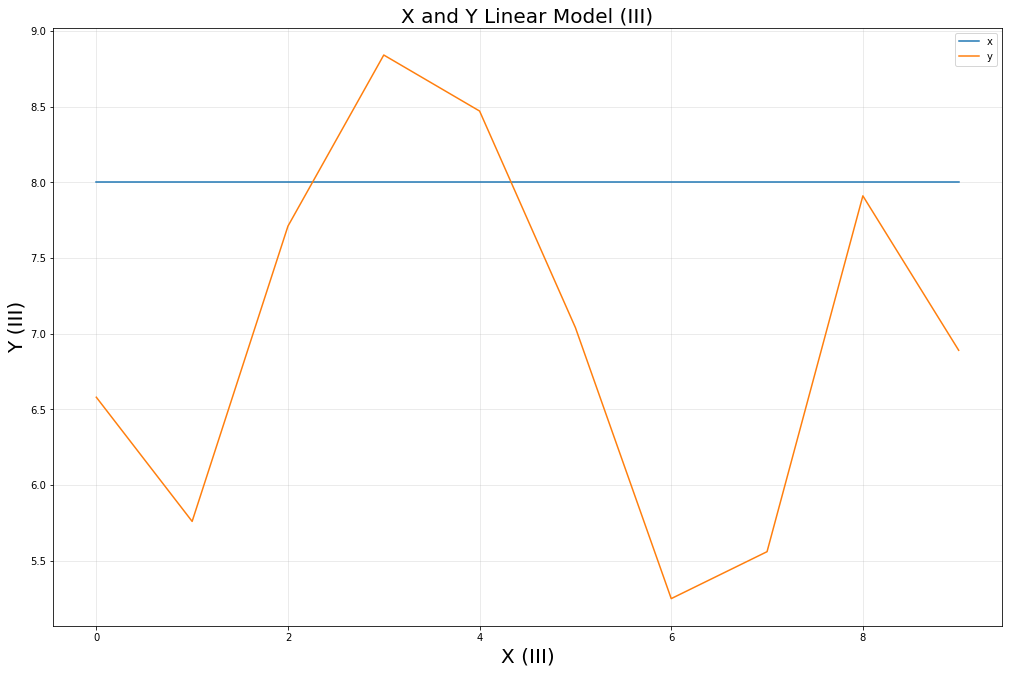

In [15]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
#x =(df['x'].loc[(df['dataset'] == 'III')])
x1 = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
y1 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89]
x = np.array(x1)
y = np.array(y1)
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X (III)", fontsize = 20)
ax.set_ylabel("Y (III)", fontsize = 20)
ax.set_title("X and Y Linear Model (III)", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())

/tmp/ipykernel_229/1603442244.py:16: RuntimeWarning: invalid value encountered in double_scalars
  coef1 = newXY / newXX


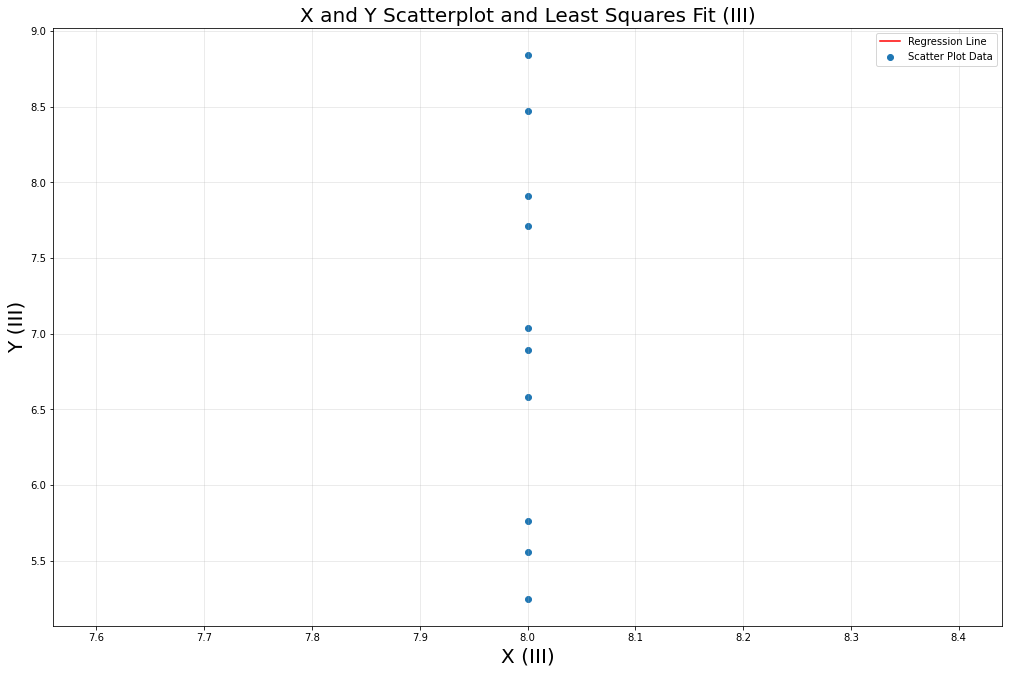

In [16]:
#Plotting the first plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (III)", fontsize = 20)
ax.set_ylabel("Y (III)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit (III)", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Removing the outlier fixed the regression line existing. Since all values of x are constant, a regression line should not exist like in the initial data set.

<br>

---
<a/ id='p5'></a>
[Back to top](#top)
## [9 points] Problem 5: Seasonal Data

The data set `pressuretime` is loaded in below, in which a pressure differential between two islands in the sourthern Pacific is recorded monthly.

- `y` is the pressure differential between islands
- `x` is in months of the year.  Whether or not the initial month is January is not provided.

In [17]:
dfpt=pd.read_csv('/home/jovyan/3022/hw/hw9/pressuretime.csv')
dfpt.head()

,y,x
0,12.9,1
1,11.3,2
2,10.6,3
3,11.2,4
4,10.9,5



#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

X min:  1 , Y min:  0.3
X Q1:  42.75 , Y Q1:  8.5
X median :  84.5 , Y median:  10.9
X Q3:  126.25 , Y Q3:  12.9
X max:  168 , Y max:  17.6
X mean:  84.5 , Y mean:  10.641666666666666
X standard deviation:  48.641546028061235 , Y standard deviation:  3.4285070626502603


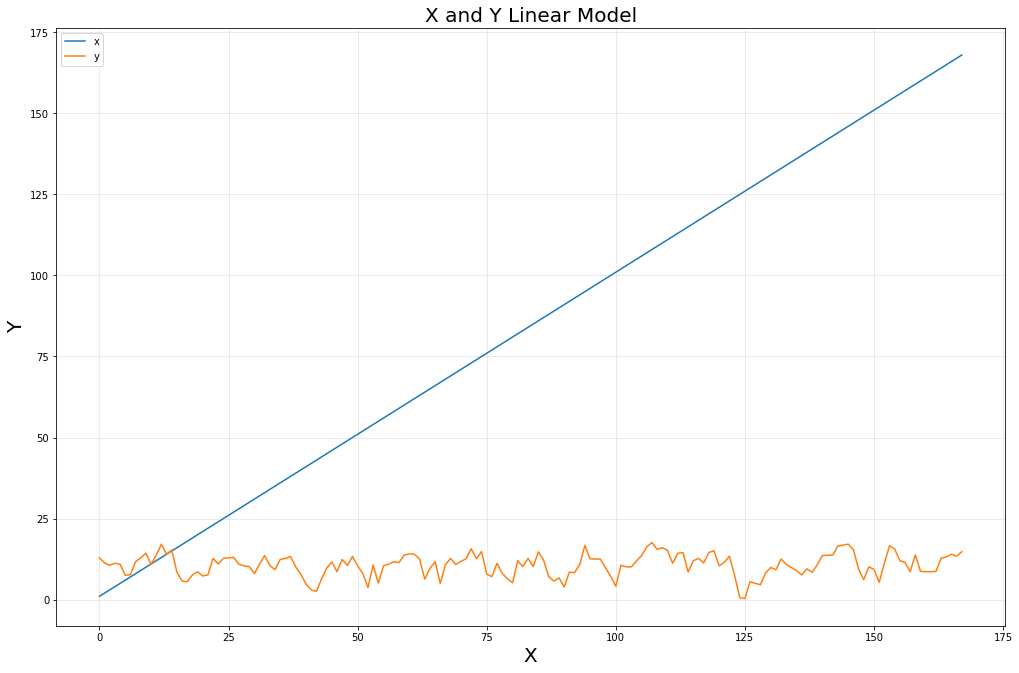

In [18]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#pulling the x and y values
x =(dfpt['x'])
y =(dfpt['y'])
plt.plot(x)
plt.plot(y)

ax.grid(alpha = .3)
ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_title("X and Y Linear Model", fontsize = 20)
ax.legend(['x', 'y'])

#printing the summary tables
print("X min: ", x.min(), ", Y min: ", y.min())
print("X Q1: ", np.quantile(x, .25), ", Y Q1: ", np.quantile(y, .25))
print("X median : ", np.quantile(x, .5), ", Y median: ", np.quantile(y, .50))
print("X Q3: ", np.quantile(x, .75), ", Y Q3: ", np.quantile(y, .75))
print("X max: ", x.max(), ", Y max: ", y.max())
print("X mean: ", x.mean(), ", Y mean: ", y.mean())
print("X standard deviation: ", x.std(), ", Y standard deviation: ", y.std())


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

You may want to zoom in on the x-axis a little to try to notice if there are +/- clumpings of the residuals...

Text(0.5, 1.0, 'Original x values vs Residuals of Least Squares')

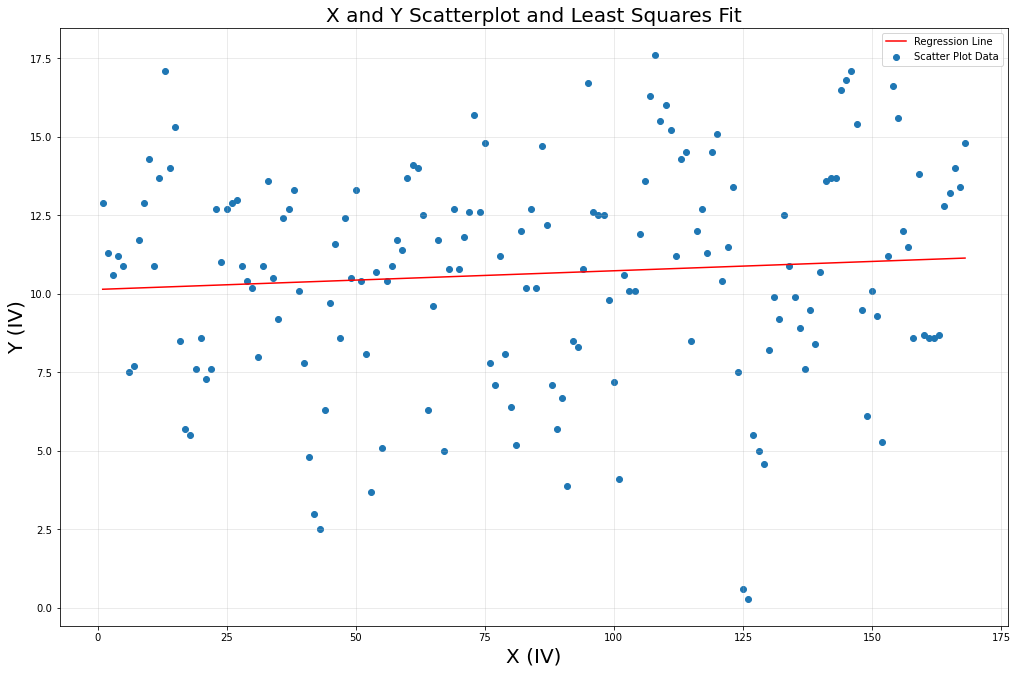

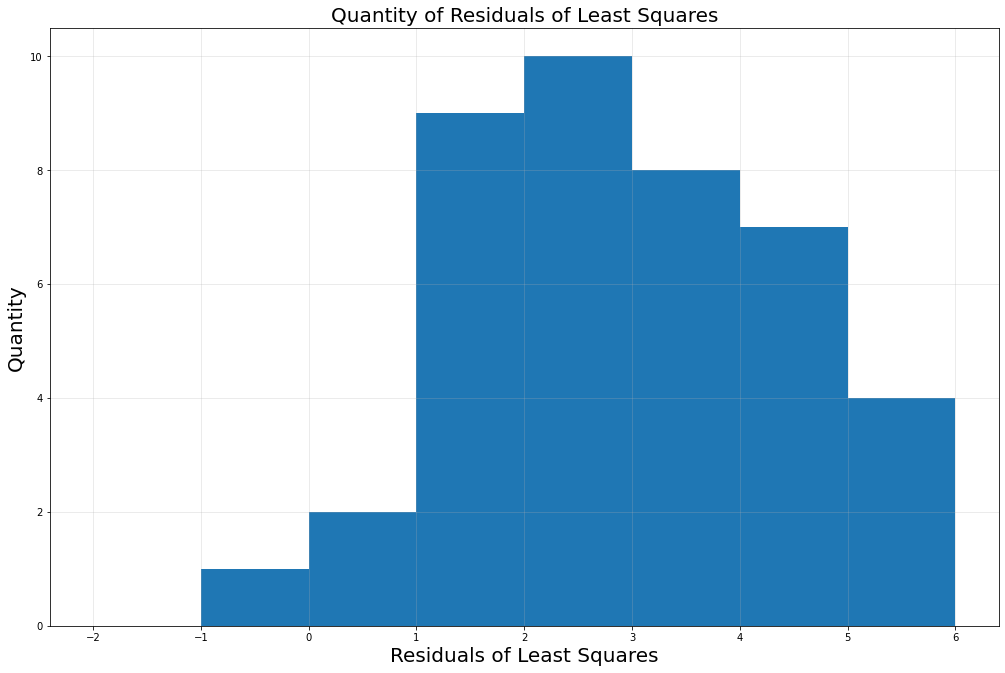

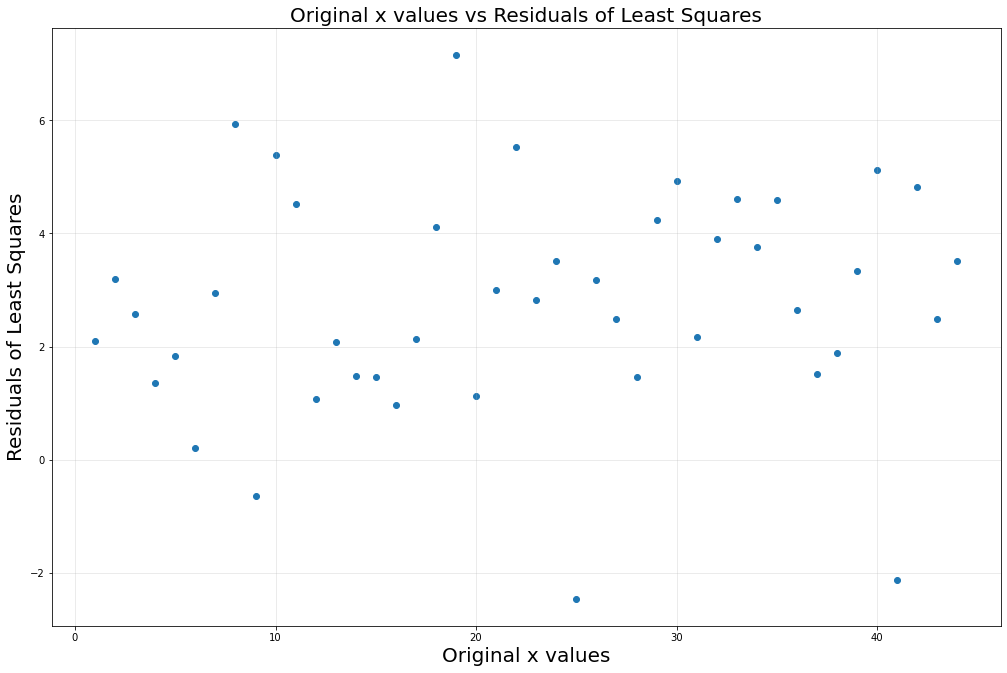

In [19]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, y)
ax.grid(alpha = .3)
ax.set_xlabel("X (IV)", fontsize = 20)
ax.set_ylabel("Y (IV)", fontsize = 20)
ax.set_title("X and Y Scatterplot and Least Squares Fit", fontsize = 20)
#calculating the means
n = np.size(x)
meanX = np.mean(x)
meanY = np.mean(y)
#calculating the deviation
newXY = np.sum(y*x) - n*meanY*meanX
newXX = np.sum(x*x) - n*meanX*meanX
#calculating the coeficients
coef1 = newXY / newXX
coef2 = meanY - coef1*meanX
final = (coef2, coef1)
#calculating the final line
line = final[0] + final[1]*x
plt.plot(x, line, color = 'red')
ax.legend(['Regression Line', 'Scatter Plot Data'])

#plotting the second plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
bins = [-2, -1, 0, 1, 2, 3, 4, 5, 6]
combo = df.sort_values('x')
newX = combo['x']
newY = combo['y']
histo = line - newY

plt.hist(histo, bins = bins)
ax.grid(alpha = .3)
ax.set_xlabel("Residuals of Least Squares", fontsize = 20)
ax.set_ylabel("Quantity", fontsize = 20)
ax.set_title("Quantity of Residuals of Least Squares", fontsize = 20)

#plotting the third plot
fig, ax = plt.subplots(1,1, figsize = (17,11))
plt.scatter(x, histo)
ax.grid(alpha = .3)
ax.set_xlabel("Original x values", fontsize = 20)
ax.set_ylabel("Residuals of Least Squares", fontsize = 20)
ax.set_title("Original x values vs Residuals of Least Squares", fontsize = 20)


#### Part C: Fixing Periodic data.  Because the data is seasonal, there are often annual cycles that play into the process.  Instead of fitting with a polynomial and higher powers of $x$, we can fit with trigonmetric functions that include the those frequencies/periodicities of the data.

Create two new columns that are $x_s=\sin(x*\frac{2\pi}{12})$ and  $x_c=\cos(x*\frac{2\pi}{12})$.  These represent functions that repeat themselves every **12** months, or annually.

Instead of fitting the usual intercept and slope for 1-D data, instead find the coefficients of the sine and cosine form the model $p=\beta_0+ \beta_s*x_s+\beta_c*x_c$.  (So give `statsmodels` the two new columns and an intercept column, but not the original `x`).

Note: a linear combination of same-phase $\sin$ and $\cos$ is the equivalent to fitting a single function of the form $y=a \sin(x+b)$, or we're already including both a phase shift and an amplitude of a **single** period-12 sinusoid here.  As a rule of thumb, always include both sine and cosine for this type of problem!

#### Part D: Plot the fit, histogram the errors, and plot the errors of the trigonmetic error, as in part B above.  Is it better?

#### Part E (extra credit, up to 5 points):  

It turns out, the *best* trigonometric model for this data includes more sinusoids than just the ones of annual period, above.  If you want to quickly check what **periods** might exist in your data, an **autocorrelation** function (acf) of a (regularly-spaced) data set measures what at what time-lags your data value exhibit patterns.

Use `sm.tsa.stattools.acf` to detect which *other* time lags you might want to use the model this data, in addition to the period of 12 months used above.  To find these:

- Find $x$, the location of the local maxima (after $t=0$) of the .acf function.  Choose the earliest values that are not multiples of one another; e.g. a spike at $t=12$ should also cause a spike at $t=24$, since they're on the same frequency.  Look for clear maxima, not minor perturbations.

- Include both $\sin(2*\pi/x)$ and $\cos(2*\pi/x)$ in your next update of your model (as well as all previously included terms), and check that your adjusted $R^2$ has improved.

- Repeat until there is no additional maxima of the acf that exceed .15, or none of the maxima you try seem to improve the model, or the acf looks relatively unpatterned (centered about 0).

[0.26659748 0.30498965 0.20116916]


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


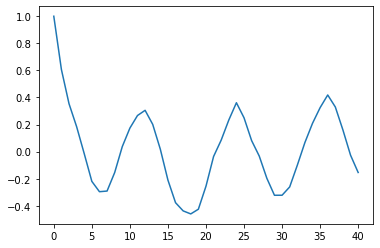

In [20]:
#since this is the original data, we notice a max around 12 (that repeats at 24, 36, etc.)!
acf=sm.tsa.stattools.acf(dfpt['y'])
plt.plot(acf)
print(acf[11:14])